# Genetic Algorithm Portfolio Optimization

## Dependencies Set-up

In [6]:
# --- Import Required Libraries ---
import os
import sys
import matplotlib.pyplot as plt

# --- Set Up Paths ---
ROOT_PATH = os.path.abspath(os.path.join(os.getcwd(), '..'))
if ROOT_PATH not in sys.path:
    sys.path.insert(0, ROOT_PATH)
    
# --- Import Custom Libraries ---
from pop.runner import runner
from pop.util.print_results import print_results
from pop.util.file_saver import prepare_file_saving, save_results, save_fitness_history, save_diversity_history

## Parameters Definition

In [7]:
# --- Define Experiment Parameters ---
# Algorithm type: 'ga' (Genetic Algorithm) or 'pso' (Particle Swarm Optimization)
algorithm_type = "pso"

# Dataset folder name
dataset_folder_name = "../dataset"

# Number of companies to include in the portfolio
num_companies = 100

# Annual risk-free rate
risk_free_rate_annual = 0.042

# Analysis period
start_date = "2015-01-01"
end_date = "2020-01-01"

# Correlation level (optional): 'low', 'medium', 'high', or None
correlation_level = 'high'

# Random seed for reproducibility
seed = 0

## Hyperparameter & Model Configuration

In [8]:
# --- Algorithm-Specific Parameters ---
# GA Parameters
ga_params = {
    "pop_size": 100,
    "max_generations": 300,
    "mutation_rate": 0.1,
    "gaussian_stdev": 0.1,
    "num_elites": 1,
    "tournament_size": 3,
}

# PSO Parameters
pso_params = {
    "swarm_size": 100,
    "max_iterations": 300,
    "w": 0.5,
    "c1": 1.5,
    "c2": 2.0,
}

# Repair method for constraint handling: 'normalize', 'clip', 'restart', 'shrink'
repair_method = "normalize"

## Experiment Execution

In [9]:
# --- Execute Experiment ---
if algorithm_type == "ga":
    params = ga_params
elif algorithm_type == "pso":
    params = pso_params
else:
    raise ValueError("Invalid algorithm type. Choose 'ga' or 'pso'.")

# Run the experiment
(results, fitness_history, diversity_history) = runner(
    algorithm_type=algorithm_type,
    dataset_folder_name=dataset_folder_name,
    num_companies=num_companies,
    risk_free_rate_annual=risk_free_rate_annual,
    start_date=start_date,
    end_date=end_date,
    correlation_level=correlation_level,
    seed=seed,
    repair_method=repair_method,
    **params
)

# --- Display Results ---
sharpe_ratio, annual_return, weights = results
print_results(sharpe_ratio, annual_return, weights)


                         PORTFOLIO OPTIMIZATION RESULTS

Sharpe Ratio: 0.9249715202937492
Annual Return: 0.2503867920808241 (25.03867920808241%)

Portfolio Distribution:
--------------------------------------------------------------------------------
Company                                           Weight      Percentage
--------------------------------------------------------------------------------
Progressive Corporation (The) Common Stock        0.0999           9.99%
Synopsys, Inc. - Common Stock                     0.0997           9.97%
Jack Henry & Associates, Inc. - Common Stock      0.0996           9.96%
IHS Markit Ltd. Common Shares                     0.0994           9.94%
Republic Services, Inc. Common Stock              0.0992           9.92%
Taiwan Semiconductor Manufacturing Company L...     0.0988           9.88%
Keurig Dr Pepper Inc. Common Stock                0.0982           9.82%
Walker & Dunlop, Inc Common Stock                 0.0953           9.53%
Sarepta 

In [10]:
# --- Save Results ---
# Prepare file saving
params = ga_params if algorithm_type == "ga" else pso_params
results_dir, filename = prepare_file_saving(
    algorithm_type=algorithm_type,
    correlation_level=correlation_level,
    params=params,
    root_path=os.path.join(ROOT_PATH, "experiments", "results")
)

# Save results
save_results(results_dir, filename, weights, sharpe_ratio, annual_return)

Results saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_H_ss-100_mi-300_w-0.5_results.csv


In [11]:
# Save fitness history
save_fitness_history(results_dir, filename, fitness_history)

Fitness history saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_H_ss-100_mi-300_w-0.5_fitness.csv


In [12]:
# Save diversity history
save_diversity_history(results_dir, filename, diversity_history)

Diversity history saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_H_ss-100_mi-300_w-0.5_diversity.csv


## Visualize fitness evolution

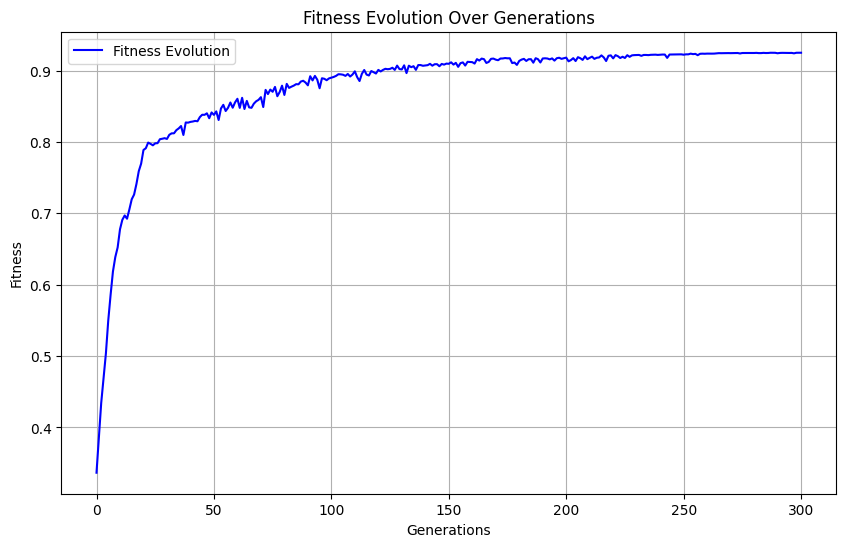

In [13]:
# ---Plotting Fitness Evolution---
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, label="Fitness Evolution", color="blue")
plt.title("Fitness Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.legend()
plt.grid()
plt.show()

In [14]:
# --- Save Fitness Evolution Plot ---
fitness_plot_path = os.path.join(results_dir, f"{filename}_fitness_evolution.png")
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, label="Fitness Evolution", color="blue")
plt.title("Fitness Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.legend()
plt.grid()
plt.savefig(fitness_plot_path)
plt.clf()
print(f"Fitness evolution plot saved to {fitness_plot_path}")

Fitness evolution plot saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_H_ss-100_mi-300_w-0.5_fitness_evolution.png


<Figure size 1000x600 with 0 Axes>

## Visualize diversity evolution

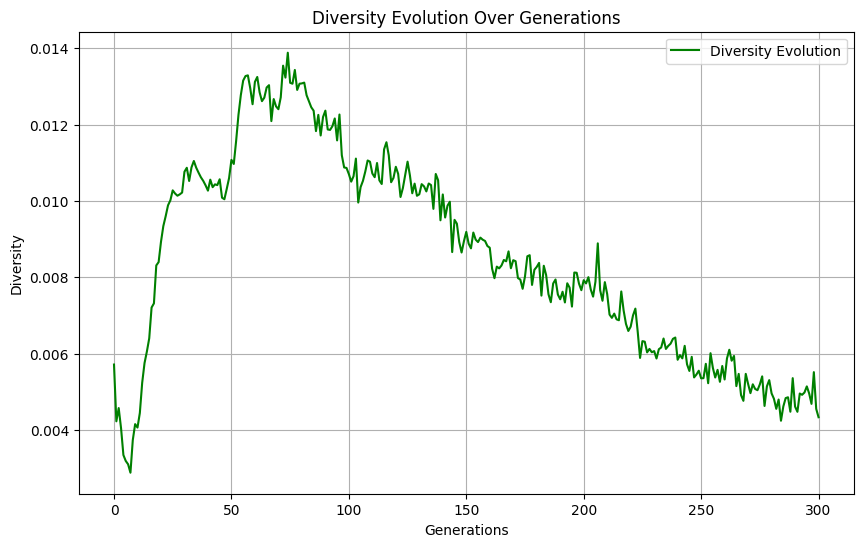

In [15]:
# --- Plot Diversity Evolution ---
plt.figure(figsize=(10, 6))
plt.plot(diversity_history, label="Diversity Evolution", color="green")
plt.title("Diversity Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Diversity")
plt.legend()
plt.grid()
plt.show()

In [16]:
# --- Save Diversity Evolution Plot ---
diversity_plot_path = os.path.join(results_dir, f"{filename}_diversity_evolution.png")
plt.figure(figsize=(10, 6))
plt.plot(diversity_history, label="Diversity Evolution", color="green")
plt.title("Diversity Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Diversity")
plt.legend()
plt.grid()
plt.savefig(diversity_plot_path)
plt.clf()
print(f"Diversity evolution plot saved to {diversity_plot_path}")

Diversity evolution plot saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_H_ss-100_mi-300_w-0.5_diversity_evolution.png


<Figure size 1000x600 with 0 Axes>

-----

## Fine Tuning

In [29]:
from itertools import product
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, friedmanchisquare

In [ ]:
# Get the absolute path to the project root
def get_project_root():
    # Find the project root by moving up the directory structure
    project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
    return project_root

# Construct the path for the results folder
def get_results_path(filename, algorithm=None):
    project_root = get_project_root()
    if algorithm:
        return os.path.join(project_root, "experiments", "results", algorithm, filename)
    return os.path.join(project_root, "experiments", "results", filename)

In [ ]:
# Number of runs for statistically significant results
NUM_RUNS = 31

# Inherit globally defined variables
DATASET = dataset_folder_name
NUM_COMPANIES = num_companies
RISK_FREE_RATE = risk_free_rate_annual
START_DATE = start_date
END_DATE = end_date

# Hyperparameters for Genetic Algorithm (GA)
# ga_param_grid = {
#     "pop_size": [50, 100],
#     "mutation_rate": [0.05, 0.1],
#     "gaussian_stdev": [0.05, 0.1],
#     "num_elites": [1, 2],
#     "max_generations": [50, 100]
# }
ga_param_grid = {
    "pop_size": [20],
    "mutation_rate": [0.05],
    "gaussian_stdev": [0.05],
    "num_elites": [1],
    "max_generations": [50]
}

# Hyperparameters for Particle Swarm Optimization (PSO)
# pso_param_grid = {
#     "swarm_size": [50, 100],
#     "max_iterations": [50, 100],
#     "w": [0.5, 0.7],
#     "c1": [1.0, 2.0],
#     "c2": [1.0, 2.0]
# }

pso_param_grid = {
    "swarm_size": [20],
    "max_iterations": [50],
    "w": [0.5],
    "c1": [2.0],
    "c2": [2.0]
}

# Possible repair methods
REPAIR_METHODS = ["normalize", "clip", "restart", "shrink"]

# Helper function to create parameter combinations
def get_param_combinations(param_grid):
    keys, values = zip(*param_grid.items())
    return [dict(zip(keys, combo)) for combo in product(*values)]

# Function to evaluate a specific configuration
def evaluate_config(algorithm_type, config, repair_method):
    scores, times, returns = [], [], []

    # Prepare file saving
    results_dir, base_filename = prepare_file_saving(
        algorithm_type=algorithm_type,
        correlation_level=correlation_level,
        params=config,
        root_path=os.path.join(os.pardir, "experiments", "results")
    )

    for _ in range(NUM_RUNS):
        start = time.time()
        try:
            # Run the experiment
            results, fitness_history, diversity_history = runner(
                algorithm_type=algorithm_type,
                dataset_folder_name=DATASET,
                num_companies=NUM_COMPANIES,
                risk_free_rate_annual=RISK_FREE_RATE,
                start_date=START_DATE,
                end_date=END_DATE,
                correlation_level=correlation_level,
                seed=seed,
                repair_method=repair_method,
                **config
            )

            # Unpack the results
            sharpe_ratio, annual_return, weights = results

            scores.append(sharpe_ratio)
            returns.append(annual_return)
            times.append(time.time() - start)

        except Exception as e:
            print(f"Error during evaluation of {algorithm_type} with config {config}: {e}")

    # Aggregate results after all runs are completed
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    mean_return = np.mean(returns)
    mean_time = np.mean(times)

    # Save the aggregated results just once
    print(f"Aggregated results for {algorithm_type} - {config}: Sharpe {mean_score:.4f}, Return {mean_return:.4f}")
    save_results(results_dir, base_filename, weights, mean_score, mean_return)
    save_fitness_history(results_dir, base_filename, fitness_history)
    save_diversity_history(results_dir, base_filename, diversity_history)

    return mean_score, std_score, mean_return, mean_time, config

# Fine-tuning process for both GA and PSO algorithms
def fine_tune_algorithms():
    results = []

    print("Starting fine-tuning for GA...")
    for repair in REPAIR_METHODS:
        for config in get_param_combinations(ga_param_grid):
            print(f"Testing GA with config: {config} + repair method: {repair}")
            mean_score, std_score, mean_return, mean_time, used_config = evaluate_config("ga", config, repair)
            results.append({
                "algorithm": "GA",
                "repair_method": repair,
                "mean_sharpe": mean_score,
                "std_sharpe": std_score,
                "mean_return": mean_return,
                "mean_time": mean_time,
                **used_config
            })

    print("\nStarting fine-tuning for PSO...")
    for repair in REPAIR_METHODS:
        for config in get_param_combinations(pso_param_grid):
            print(f"Testing PSO with config: {config} + repair method: {repair}")
            mean_score, std_score, mean_return, mean_time, used_config = evaluate_config("pso", config, repair)
            results.append({
                "algorithm": "PSO",
                "repair_method": repair,
                "mean_sharpe": mean_score,
                "std_sharpe": std_score,
                "mean_return": mean_return,
                "mean_time": mean_time,
                **used_config
            })

    # Save fine-tuning results to algorithm-specific directory
    for algo_type in ["GA", "PSO"]:
        algo_results = [r for r in results if r['algorithm'] == algo_type]
        df = pd.DataFrame(algo_results)
        result_path = get_results_path("fine_tuning_results.csv", algo_type.lower())
        os.makedirs(os.path.dirname(result_path), exist_ok=True)
        df.to_csv(result_path, index=False)
        print(f"✅ Fine-tuning results for {algo_type} saved to '{result_path}/fine_tuning_results.csv'")

    return results

# Execute fine-tuning
fine_tuning_results = fine_tune_algorithms()


Starting fine-tuning for GA...
Testing GA with config: {'pop_size': 20, 'mutation_rate': 0.05, 'gaussian_stdev': 0.05, 'num_elites': 1, 'max_generations': 50} + repair method: normalize
Aggregated results for ga - {'pop_size': 20, 'mutation_rate': 0.05, 'gaussian_stdev': 0.05, 'num_elites': 1, 'max_generations': 50}: Sharpe 0.6524, Return 74.9193
Results saved to ..\experiments\results\ga\exp_H_ps-20_mg-50_mr-0.05_results.csv
Fitness history saved to ..\experiments\results\ga\exp_H_ps-20_mg-50_mr-0.05_fitness.csv
Diversity history saved to ..\experiments\results\ga\exp_H_ps-20_mg-50_mr-0.05_diversity.csv
Testing GA with config: {'pop_size': 20, 'mutation_rate': 0.05, 'gaussian_stdev': 0.05, 'num_elites': 1, 'max_generations': 50} + repair method: clip
Aggregated results for ga - {'pop_size': 20, 'mutation_rate': 0.05, 'gaussian_stdev': 0.05, 'num_elites': 1, 'max_generations': 50}: Sharpe 0.7161, Return 33.1038
Results saved to ..\experiments\results\ga\exp_H_ps-20_mg-50_mr-0.05_result

In [ ]:
# Get the absolute path to the project root
def get_project_root():
    current_dir = os.getcwd()
    while True:
        if os.path.basename(current_dir) == "BAO_Portfolio-Optimization-Problem":
            return current_dir
        parent_dir = os.path.dirname(current_dir)
        if parent_dir == current_dir:
            # If we reached the root directory without finding the project folder
            raise FileNotFoundError("Project root 'BAO_Portfolio-Optimization-Problem' not found.")
        current_dir = parent_dir

# Construct the path for the results folder
def get_results_path(filename, algorithm=None):
    project_root = get_project_root()
    if algorithm:
        return os.path.join(project_root, "experiments", "results", algorithm, filename)
    return os.path.join(project_root, "experiments", "results", filename)

# Load fine-tuning results from both algorithm files (GA and PSO)
def load_fine_tuning_results():
    ga_file_path = get_results_path("fine_tuning_results.csv", "ga")
    pso_file_path = get_results_path("fine_tuning_results.csv", "pso")
    try:
        print(f"🔍 Loading GA results from: {ga_file_path}")
        ga_results = pd.read_csv(ga_file_path)
    except FileNotFoundError:
        print(f"⚠️ GA fine-tuning results not found at {ga_file_path}.")
        ga_results = None

    try:
        print(f"🔍 Loading PSO results from: {pso_file_path}")
        pso_results = pd.read_csv(pso_file_path)
    except FileNotFoundError:
        print(f"⚠️ PSO fine-tuning results not found at {pso_file_path}.")
        pso_results = None

    # Combine both DataFrames if available
    if ga_results is not None and pso_results is not None:
        combined_results = pd.concat([ga_results, pso_results], ignore_index=True)
        print("✅ Combined GA and PSO results loaded successfully.")
        return combined_results
    elif ga_results is not None:
        print("✅ Only GA results loaded successfully.")
        return ga_results
    elif pso_results is not None:
        print("✅ Only PSO results loaded successfully.")
        return pso_results
    else:
        print("⚠️ No fine-tuning results found for either algorithm.")
        return None

# Function to find the best, median, and worst configurations
def select_configs(df, algorithm):
    df_algo = df[df["algorithm"] == algorithm]
    best_config = df_algo.loc[df_algo["mean_sharpe"].idxmax()].copy()
    worst_config = df_algo.loc[df_algo["mean_sharpe"].idxmin()].copy()
    median_config = df_algo.iloc[(len(df_algo) // 2)].copy()

    # Label the quality for each configuration
    best_config["quality"] = "best"
    median_config["quality"] = "median"
    worst_config["quality"] = "worst"

    print(f"🏆 Best configuration for {algorithm}:\n{best_config}\n")
    print(f"⚖️ Median configuration for {algorithm}:\n{median_config}\n")
    print(f"🚫 Worst configuration for {algorithm}:\n{worst_config}\n")

    return best_config, median_config, worst_config

# Save the selected configurations to a file
def save_selected_configs():
    fine_tuning_results = load_fine_tuning_results()
    if fine_tuning_results is not None:
        best_ga, median_ga, worst_ga = select_configs(fine_tuning_results, "GA")
        best_pso, median_pso, worst_pso = select_configs(fine_tuning_results, "PSO")

        # Combine the best, median, and worst configurations
        selected_configs = pd.DataFrame([best_ga, median_ga, worst_ga, best_pso, median_pso, worst_pso])
        file_path = get_results_path("selected_configs.csv")
        selected_configs.to_csv(file_path, index=False)
        print(f"✅ Selected configurations saved to '{file_path}'")
    else:
        print("⚠️ No fine-tuning results found for saving configurations.")

# Save configurations
save_selected_configs()

🔍 Loading GA results from: c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\ga\fine_tuning_results.csv
🔍 Loading PSO results from: c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\fine_tuning_results.csv
✅ Combined GA and PSO results loaded successfully.
🏆 Best configuration for GA:
algorithm                 GA
repair_method           clip
mean_sharpe         0.716116
std_sharpe               0.0
mean_return        33.103844
mean_time           9.051642
pop_size                20.0
mutation_rate           0.05
gaussian_stdev          0.05
num_elites               1.0
max_generations         50.0
swarm_size               NaN
max_iterations           NaN
w                        NaN
c1                       NaN
c2                       NaN
quality                 best
Name: 1, dtype: object

⚖️ Median configuration for GA:
algorithm                 GA
repair_method        restart
mean_sharpe          0.65242
std_sharpe               0.0
mean_re